In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\scanimage\AppData\Local\Temp\ipykernel_1316\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [77]:
import sys
import glob
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\scanimage\Documents\JJM\post_cnmfe_analysis")
import dlc_utils as dlc
import os
import datetime
import math
from matplotlib.dates import DateFormatter, date2num
from tqdm import tqdm 

In [3]:
data_folder = r"F:\\JJM\\behavCam_videos_for_analysis\\v4_fenobaminjections"

In [4]:
ezTrack_location_files = glob.glob(data_folder+ r"\\**\\" + '*LocationOutput.csv')

In [234]:
len(ezTrack_location_files)

17

In [236]:
ezTrack_location_files[15]

'F:\\\\JJM\\\\behavCam_videos_for_analysis\\\\v4_fenobaminjections\\DIO_r2.8_16_45_11\\DIO_r2.8_16_45_11combined_LocationOutput.csv'

In [237]:
sessionPath = 'F:\\\\JJM\\\\behavCam_videos_for_analysis\\\\v4_fenobaminjections\\DIO_r2.8_16_45_11\\DIO_r2.8_16_45_11combined_LocationOutput.csv'
print(sessionPath)

F:\\JJM\\behavCam_videos_for_analysis\\v4_fenobaminjections\DIO_r2.8_16_45_11\DIO_r2.8_16_45_11combined_LocationOutput.csv


In [238]:
'\\'.join(sessionPath.split(os.sep)[:-1])+'\\timestamps.csv'

'F:\\\\JJM\\\\behavCam_videos_for_analysis\\\\v4_fenobaminjections\\DIO_r2.8_16_45_11\\timestamps.csv'

In [239]:
# load eZ track output and behavior camera timestamps from miniscope software 
ezTrackOutput = pd.read_csv(sessionPath)
timestampfile = pd.read_table('\\'.join(sessionPath.split(os.sep)[:-1])+'\\timestamps.csv', delimiter=',')
miniscope_timestampfile = pd.read_table('\\'.join(sessionPath.split(os.sep)[:-1])+'\\timestampsMiniscope.csv', delimiter=',')

In [240]:
timestampfile['Time Stamp (ms)'].iloc[-1]/(1000*60)

30.094516666666667

In [241]:
miniscope_timestampfile['Time Stamp (ms)'].iloc[-1]/(1000*60)

30.095266666666667

In [242]:
timestampfile

,Frame Number,Time Stamp (ms),Buffer Index
0,0,-74,0
1,1,2,0
2,2,64,0
3,3,128,0
4,4,192,0
...,...,...,...
27128,27128,1805414,0
27129,27129,1805478,0
27130,27130,1805540,0
27131,27131,1805607,0


In [243]:
miniscope_timestampfile

,Frame Number,Time Stamp (ms),Buffer Index
0,0,-5,0
1,1,46,0
2,2,97,0
3,3,147,0
4,4,198,0
...,...,...,...
35677,35677,1805515,0
35678,35678,1805565,0
35679,35679,1805616,0
35680,35680,1805666,0


In [244]:
miniscope_timestampfile['Time Stamp (ms)'].loc[4]

198

In [289]:
#.set_index(pd.to_timedelta(np.linspace(0, (len(veloctiyDataFrame)-1)*(1/frame_rate), len(veloctiyDataFrame)), unit='s'))
frame_rate=15
timestampfile_td = timestampfile.set_index(pd.to_timedelta(np.linspace(0, (len(timestampfile)-1)*(1/frame_rate), len(timestampfile)), unit='s'), drop=False)
behavCamTimeStampsDownsampled = timestampfile_td.resample('.2S').bfill()
behavCamTimeStampsMedian = behavCamTimeStampsDownsampled.resample('1S').median()
behavCamTimeStampsResampled = behavCamTimeStampsMedian.resample('.2S').bfill()

In [290]:
#.set_index(pd.to_timedelta(np.linspace(0, (len(veloctiyDataFrame)-1)*(1/frame_rate), len(veloctiyDataFrame)), unit='s'))
frame_rate=20
miniscopetimestamp_td = miniscope_timestampfile.set_index(pd.to_timedelta(np.linspace(0, (len(miniscope_timestampfile)-1)*(1/frame_rate), len(miniscope_timestampfile)), unit='s'), drop=False)
miniscopeTimeStampsDownsampled = miniscopetimestamp_td.resample('.2S').bfill()
miniscopeTimeStampsMedian = miniscopeTimeStampsDownsampled.resample('1S').median()
miniscopeTimeStampsResampled = miniscopeTimeStampsMedian.resample('.2S').bfill()

In [291]:
behavCamTimeStampsResampled

,Frame Number,Time Stamp (ms),Buffer Index
0 days 00:00:00,6.0,325.0,0.0
0 days 00:00:00.200000,21.0,1328.0,0.0
0 days 00:00:00.400000,21.0,1328.0,0.0
0 days 00:00:00.600000,21.0,1328.0,0.0
0 days 00:00:00.800000,21.0,1328.0,0.0
...,...,...,...
0 days 00:30:07.200000,27126.0,1805272.0,0.0
0 days 00:30:07.400000,27126.0,1805272.0,0.0
0 days 00:30:07.600000,27126.0,1805272.0,0.0
0 days 00:30:07.800000,27126.0,1805272.0,0.0


In [292]:
miniscopeTimeStampsResampled

,Frame Number,Time Stamp (ms),Buffer Index
0 days 00:00:00,8.0,400.0,0.0
0 days 00:00:00.200000,28.0,1412.0,0.0
0 days 00:00:00.400000,28.0,1412.0,0.0
0 days 00:00:00.600000,28.0,1412.0,0.0
0 days 00:00:00.800000,28.0,1412.0,0.0
...,...,...,...
0 days 00:29:43.200000,35680.0,1805666.0,0.0
0 days 00:29:43.400000,35680.0,1805666.0,0.0
0 days 00:29:43.600000,35680.0,1805666.0,0.0
0 days 00:29:43.800000,35680.0,1805666.0,0.0


In [293]:
behavCam_frames = []
sys_clock_behavCam = []
#create "key" for aligning miniscope frames to timestamp file
#then create behavior TD and align
for msCam_frame in tqdm(range(0, len(miniscopeTimeStampsResampled['Frame Number']))):
        #get sys clock time of each miniscope recorded frame
        #sys_clock_msCam = time_stamps['sysClock'].loc[msCam_frame]
        #find behav cam frame closest to sys clock time of ms frame
        behavCam_frame = list(behavCamTimeStampsResampled.iloc[(behavCamTimeStampsResampled['Time Stamp (ms)']-miniscopeTimeStampsResampled['Time Stamp (ms)'].iloc[msCam_frame]).abs().argsort()[:1]].index)[0]
        behavCam_frames.append(behavCam_frame)
        sys_clock_behavCam.append(behavCamTimeStampsResampled.loc[behavCam_frame]['Time Stamp (ms)'])

behavCamIdxToAlign = [behavCamTimeStampsResampled.index.get_loc(idx) for idx in behavCam_frames]


100%|████████████████████████████████████████████████████████████████████████████| 8921/8921 [00:06<00:00, 1378.71it/s]


In [294]:
miniscope_timestampfile['Time Stamp (ms)'].diff().mean()

50.607354053978305

In [295]:
int(1000/timestampfile['Time Stamp (ms)'].diff().mean())

15

In [296]:
#ezTrackOutput

In [297]:
# separate behavCam time stamps
behavCamTimeStamps = timestampfile['Time Stamp (ms)']
behavCamTimeStamps

0            -74
1              0
2             64
3            128
4            192
          ...   
27128    1805414
27129    1805478
27130    1805540
27131    1805607
27132    1805671
Name: Time Stamp (ms), Length: 27133, dtype: int64

In [298]:
behavCamTimeStamps[0:len(ezTrackOutput)]

0            -74
1              0
2             64
3            128
4            192
          ...   
27128    1805414
27129    1805478
27130    1805540
27131    1805607
27132    1805671
Name: Time Stamp (ms), Length: 27133, dtype: int64

In [299]:
# get times of frames
behavCamTimes = behavCamTimeStamps
# set 1st frame to 0 
behavCamTimes[1] = 0 
# reset index to 0 
#behavCamTimes = behavCamTimes.reset_index()

In [300]:
# delta T between frames for analyzed videos 
behavCamFrameTimeDelta = behavCamTimes.diff()[0:len(ezTrackOutput)]

In [301]:
behavCamTimes

0            -74
1              0
2             64
3            128
4            192
          ...   
27128    1805414
27129    1805478
27130    1805540
27131    1805607
27132    1805671
Name: Time Stamp (ms), Length: 27133, dtype: int64

In [302]:
behavCamFrameTimeDelta

0         NaN
1        74.0
2        64.0
3        64.0
4        64.0
         ... 
27128    76.0
27129    64.0
27130    62.0
27131    67.0
27132    64.0
Name: Time Stamp (ms), Length: 27133, dtype: float64

In [303]:
ezTrackOutput.head()

,File,Location_Thresh,Use_Window,Window_Weight,Window_Size,Start_Frame,Frame,X,Y,Distance_px,Distance_cm
0,DIO_r2.8_16_45_11combined.avi,99.0,True,0.9,200.0,0.0,0,328.958374,287.030055,0.000000,0.000000
1,DIO_r2.8_16_45_11combined.avi,99.0,True,0.9,200.0,0.0,1,329.403787,286.394925,0.775746,0.098431
2,DIO_r2.8_16_45_11combined.avi,99.0,True,0.9,200.0,0.0,2,329.147695,284.883176,1.533287,0.194552
3,DIO_r2.8_16_45_11combined.avi,99.0,True,0.9,200.0,0.0,3,328.706833,285.104714,0.493394,0.062605
4,DIO_r2.8_16_45_11combined.avi,99.0,True,0.9,200.0,0.0,4,325.868854,281.986916,4.216016,0.534953


In [304]:
# get velocity from frame times 
velocity = abs(ezTrackOutput['Distance_cm'].diff())/(behavCamFrameTimeDelta/1000)

In [305]:
# data frame of mouse velocity 
veloctiyDataFrame = pd.concat([ezTrackOutput[['Frame', 'X', 'Y', 'Distance_px', 'Distance_cm']], 
                               behavCamTimes[0:len(ezTrackOutput)],
                               pd.DataFrame(velocity, columns=['Velocity'])], axis=1)

In [306]:
veloctiyDataFrame

,Frame,X,Y,Distance_px,Distance_cm,Time Stamp (ms),Velocity
0,0,328.958374,287.030055,0.000000,0.000000,-74,NaN
1,1,329.403787,286.394925,0.775746,0.098431,0,1.330152
2,2,329.147695,284.883176,1.533287,0.194552,64,1.501894
3,3,328.706833,285.104714,0.493394,0.062605,128,2.061682
4,4,325.868854,281.986916,4.216016,0.534953,192,7.380440
...,...,...,...,...,...,...,...
27128,27128,252.363277,339.331359,2.551007,0.323687,1805414,12.396048
27129,27129,278.678970,344.380687,26.795734,3.400000,1805478,48.067400
27130,27130,260.903226,342.269795,17.900641,2.271339,1805540,18.204222
27131,27131,264.046805,343.964339,3.571214,0.453137,1805607,27.137342


In [307]:
#frame rate for behavCam 
veloctiyDataFrame['Time Stamp (ms)'].diff().mean()

66.55406899601947

In [308]:
frame_rate = int(1000/veloctiyDataFrame['Time Stamp (ms)'].diff().mean())

In [309]:
frame_rate

15

In [310]:
veloctiyDataFrame

,Frame,X,Y,Distance_px,Distance_cm,Time Stamp (ms),Velocity
0,0,328.958374,287.030055,0.000000,0.000000,-74,NaN
1,1,329.403787,286.394925,0.775746,0.098431,0,1.330152
2,2,329.147695,284.883176,1.533287,0.194552,64,1.501894
3,3,328.706833,285.104714,0.493394,0.062605,128,2.061682
4,4,325.868854,281.986916,4.216016,0.534953,192,7.380440
...,...,...,...,...,...,...,...
27128,27128,252.363277,339.331359,2.551007,0.323687,1805414,12.396048
27129,27129,278.678970,344.380687,26.795734,3.400000,1805478,48.067400
27130,27130,260.903226,342.269795,17.900641,2.271339,1805540,18.204222
27131,27131,264.046805,343.964339,3.571214,0.453137,1805607,27.137342


In [311]:
# create time delta for behavior index
# behavCam for v3 should record at 30 fps, can verify in timestamp file, check this is set correctly in concactenated videos
veloctiyDataFrame = veloctiyDataFrame.set_index(pd.to_timedelta(np.linspace(0, (len(veloctiyDataFrame)-1)*(1/frame_rate), len(veloctiyDataFrame)), unit='s'))
veloctiyDataFrame

,Frame,X,Y,Distance_px,Distance_cm,Time Stamp (ms),Velocity
0 days 00:00:00,0,328.958374,287.030055,0.000000,0.000000,-74,NaN
0 days 00:00:00.066666667,1,329.403787,286.394925,0.775746,0.098431,0,1.330152
0 days 00:00:00.133333333,2,329.147695,284.883176,1.533287,0.194552,64,1.501894
0 days 00:00:00.200000,3,328.706833,285.104714,0.493394,0.062605,128,2.061682
0 days 00:00:00.266666667,4,325.868854,281.986916,4.216016,0.534953,192,7.380440
...,...,...,...,...,...,...,...
0 days 00:30:08.533333332,27128,252.363277,339.331359,2.551007,0.323687,1805414,12.396048
0 days 00:30:08.600000,27129,278.678970,344.380687,26.795734,3.400000,1805478,48.067400
0 days 00:30:08.666666667,27130,260.903226,342.269795,17.900641,2.271339,1805540,18.204222
0 days 00:30:08.733333333,27131,264.046805,343.964339,3.571214,0.453137,1805607,27.137342


In [312]:
len(veloctiyDataFrame)

27133

In [313]:
## smooth velocity by upsampling 

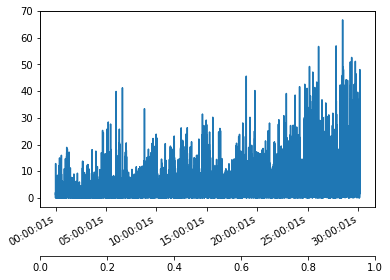

In [314]:
xRangeFrames=(0,58000)
y = veloctiyDataFrame['Velocity'][xRangeFrames[0]:xRangeFrames[1]]
#recording_start_time = datetime.datetime.fromtimestamp(abs(timestampfile[timestampfile['camNum'] == 1]['sysClock'][1]))
#plot x axis time
recording_start_time = datetime.datetime(1970, 1, 1, hour=0, minute=0, second=0, microsecond=0)
x = [recording_start_time+veloctiyDataFrame.index[i] for i in range(len(veloctiyDataFrame.index))][xRangeFrames[0]:xRangeFrames[1]]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
fig.subplots_adjust(bottom=0.2)

myFmt = DateFormatter("%M:%S:%ms")
ax1.xaxis.set_major_formatter(myFmt)
ax1.plot(x, y)
plt.gcf().autofmt_xdate()

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

plt.show()

In [315]:
downsampledDataFrame = veloctiyDataFrame.resample('.2S').mean()[['X', 'Y']]
# calculate new euclidean distance based on mean values here 
## remove frames here to align with miniscope df 
#downsampledDataFrame = downsampledDataFrameToAlign.iloc[behavCamIdxToAlign]

In [316]:
downsampledDataFrame


,X,Y
0 days 00:00:00,329.169952,286.102719
0 days 00:00:00.200000,325.418763,283.116061
0 days 00:00:00.400000,320.162867,287.652740
0 days 00:00:00.600000,320.040652,293.575814
0 days 00:00:00.800000,313.510940,301.149760
...,...,...
0 days 00:30:08,253.831850,339.228472
0 days 00:30:08.200000,255.177272,341.789890
0 days 00:30:08.400000,256.644550,340.565857
0 days 00:30:08.600000,267.876334,343.538273


In [317]:
cmPerPixel = veloctiyDataFrame['Distance_cm'][1]/veloctiyDataFrame['Distance_px'][1]
#cmPerPixel = 10
print(cmPerPixel)

def euclideanDistance(row):
    return(math.sqrt(row['X']**2+row['Y']**2))

def smoothedVelocity(row, cmPerPixel):
    #euclidean distance divided by sampling rate, multiplied by cm/pixel
    return((math.sqrt(row['X']**2+row['Y']**2)/.2)*cmPerPixel)
    
downsampledDataFrame['smoothedVelocity'] = downsampledDataFrame.diff().apply(lambda row : smoothedVelocity(row, cmPerPixel), axis=1)

0.1268858800773694


In [318]:
downsampledDataFrame

,X,Y,smoothedVelocity
0 days 00:00:00,329.169952,286.102719,NaN
0 days 00:00:00.200000,325.418763,283.116061,3.042057
0 days 00:00:00.400000,320.162867,287.652740,4.404873
0 days 00:00:00.600000,320.040652,293.575814,3.758572
0 days 00:00:00.800000,313.510940,301.149760,6.344351
...,...,...,...
0 days 00:30:08,253.831850,339.228472,4.113976
0 days 00:30:08.200000,255.177272,341.789890,1.835577
0 days 00:30:08.400000,256.644550,340.565857,1.212268
0 days 00:30:08.600000,267.876334,343.538273,7.371082


In [320]:
#downsample once more to 1S as a "median filter"
downsampledMedian = downsampledDataFrame.resample('1S').median()
resampledToAlign = downsampledMedian.resample('.2S').bfill()
#downsampledMedian
resampled = resampledToAlign.iloc[behavCamIdxToAlign]

In [321]:
behavCamIdxToAlign[-1]

9040

In [322]:
resampled

,X,Y,smoothedVelocity
0 days 00:00:00,320.162867,287.652740,4.081723
0 days 00:00:00.200000,316.162499,305.784221,0.765492
0 days 00:00:00.200000,316.162499,305.784221,0.765492
0 days 00:00:00.200000,316.162499,305.784221,0.765492
0 days 00:00:00.200000,316.162499,305.784221,0.765492
...,...,...,...
0 days 00:30:08,255.177272,340.565857,4.113976
0 days 00:30:08,255.177272,340.565857,4.113976
0 days 00:30:08,255.177272,340.565857,4.113976
0 days 00:30:08,255.177272,340.565857,4.113976


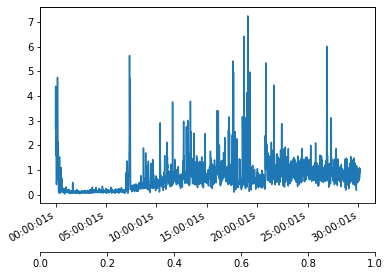

In [187]:
velocity_resampled = downsampledMedian.resample('.2S').bfill()
xRangeFrames=(0,10000)
columnToPlot = 'smoothedVelocity'
y = velocity_resampled[columnToPlot][xRangeFrames[0]:xRangeFrames[1]]
#recording_start_time = datetime.datetime.fromtimestamp(abs(timestampfile[timestampfile['camNum'] == 1]['sysClock'][1]))
#plot x axis time
recording_start_time = datetime.datetime(1970, 1, 1, hour=0, minute=0, second=0, microsecond=0)
x = [recording_start_time+velocity_resampled.index[i] for i in range(len(velocity_resampled.index))][xRangeFrames[0]:xRangeFrames[1]]

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
fig.subplots_adjust(bottom=0.2)

myFmt = DateFormatter("%M:%S:%ms")
ax1.xaxis.set_major_formatter(myFmt)
ax1.plot(x, y)
plt.gcf().autofmt_xdate()

# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.25))

plt.show()

In [188]:
#velocity_resampled[(velocity_resampled['smoothedVelocity']>0) & (velocity_resampled['smoothedVelocity']<0.5)]


In [727]:
# define velocity bins and save output to csv files for clustering analysis
velocityBins = [(0, 0.5), (0.5, 1), (1, 2), (2, 5), (5, 10), (10, math.inf)]

In [728]:
#get indicies corresponding to velocity bins 
indiciesVbin0 = pd.DataFrame([velocity_resampled.index.get_loc(velocity_resampled[(velocity_resampled['smoothedVelocity']>0) & (velocity_resampled['smoothedVelocity']<0.5)].index[i]) 
 for i in range(len(velocity_resampled[(velocity_resampled['smoothedVelocity']>0) & (velocity_resampled['smoothedVelocity']<0.5)].index))], columns=['Indicies'])
indiciesVbin1 = pd.DataFrame([velocity_resampled.index.get_loc(velocity_resampled[(velocity_resampled['smoothedVelocity']>0.5) & (velocity_resampled['smoothedVelocity']<1)].index[i]) 
 for i in range(len(velocity_resampled[(velocity_resampled['smoothedVelocity']>0.5) & (velocity_resampled['smoothedVelocity']<1)].index))], columns=['Indicies'])
indiciesVbin2 = pd.DataFrame([velocity_resampled.index.get_loc(velocity_resampled[(velocity_resampled['smoothedVelocity']>1) & (velocity_resampled['smoothedVelocity']<2)].index[i]) 
 for i in range(len(velocity_resampled[(velocity_resampled['smoothedVelocity']>1) & (velocity_resampled['smoothedVelocity']<2)].index))], columns=['Indicies'])
indiciesVbin3 = pd.DataFrame([velocity_resampled.index.get_loc(velocity_resampled[(velocity_resampled['smoothedVelocity']>2) & (velocity_resampled['smoothedVelocity']<5)].index[i]) 
 for i in range(len(velocity_resampled[(velocity_resampled['smoothedVelocity']>2) & (velocity_resampled['smoothedVelocity']<5)].index))], columns=['Indicies'])
indiciesVbin4 = pd.DataFrame([velocity_resampled.index.get_loc(velocity_resampled[(velocity_resampled['smoothedVelocity']>5) & (velocity_resampled['smoothedVelocity']<10)].index[i]) 
 for i in range(len(velocity_resampled[(velocity_resampled['smoothedVelocity']>5) & (velocity_resampled['smoothedVelocity']<10)].index))], columns=['Indicies'])
indiciesVbin5 = pd.DataFrame([velocity_resampled.index.get_loc(velocity_resampled[(velocity_resampled['smoothedVelocity']>10) & (velocity_resampled['smoothedVelocity']<math.inf)].index[i]) 
 for i in range(len(velocity_resampled[(velocity_resampled['smoothedVelocity']>10) & (velocity_resampled['smoothedVelocity']<math.inf)].index))], columns=['Indicies'])

In [729]:
#save to csv files 
basePath=r'F:\\JJM\\behavCam_videos_for_analysis\\dSPNOpenFieldRecordings'
indiciesVbin0.to_csv(basePath+'\\'+os.path.split(sessionPath)[0].split('\\')[-1]+'_movingFrameIndicies5Hz_vbin0.csv')
indiciesVbin1.to_csv(basePath+'\\'+os.path.split(sessionPath)[0].split('\\')[-1]+'_movingFrameIndicies5Hz_vbin1.csv')
indiciesVbin2.to_csv(basePath+'\\'+os.path.split(sessionPath)[0].split('\\')[-1]+'_movingFrameIndicies5Hz_vbin2.csv')
indiciesVbin3.to_csv(basePath+'\\'+os.path.split(sessionPath)[0].split('\\')[-1]+'_movingFrameIndicies5Hz_vbin3.csv')
indiciesVbin4.to_csv(basePath+'\\'+os.path.split(sessionPath)[0].split('\\')[-1]+'_movingFrameIndicies5Hz_vbin4.csv')
indiciesVbin5.to_csv(basePath+'\\'+os.path.split(sessionPath)[0].split('\\')[-1]+'_movingFrameIndicies5Hz_vbin5.csv')
print(os.path.split(sessionPath)[0].split('\\')[-1])

GRIN041_H16_M35_S12


In [730]:
indiciesVbin5

,Indicies
0,631
1,632
2,633
3,634
4,635
5,636
6,637
7,638
8,639
9,640


In [ ]:
#move to quest
#res_files=8f796c9e-f5c8-11e5-9842-22000b9da45e
#quest=d5990400-6d04-11e5-ba46-22000b92c6ec
#res_files_base_dir = '8f796c9e-f5c8-11e5-9842-22000b9da45e:/rdss/jma819/fsmresfiles/Projects/JJM/MiniscopeMovies/scope_data/'
#quest_dir = 'd5990400-6d04-11e5-ba46-22000b92c6ec:/projects/b1118/behaviorvideos/timestampfiles/'

In [ ]:
#for session in list(time_stamp_file_locations.keys()):
#    transfer_info = res_files_base_dir+time_stamp_file_locations[session]+' '+quest_dir+session+'_timestamp.dat'
#    !eval "globus transfer" $transfer_info

In [ ]:
##frame by frame alignment to miniscope camera

sessions = [f_path.split('/')[-1].rstrip('_raw_trace.csv') for f_path in mm_raw_traces]

sessions = ['GRIN039_H14_M8_S53', 'GRIN026_H16_M35_S34', 'GRIN032_H16_M49_S22']

for session in sessions:
    print(session)
    timestampfile = '/projects/b1118/behaviorvideos/timestampfiles/'+session+'_timestamp.dat'
    frame_clock_df = pd.read_table(timestampfile)
    output_directory = '/projects/b1118/miniscope/analysis/compiled_data/mm_tracking_output/'

    Cam0_timestamps = frame_clock_df[frame_clock_df['camNum'] == 0]  
    Cam1_timestamps = frame_clock_df[frame_clock_df['camNum'] == 1]
    #beavCam is usually faster framerate 
    if Cam1_timestamps['sysClock'].iloc[1:].diff().mean()<Cam0_timestamps['sysClock'].iloc[1:].diff().mean():
        msCam_camnum=0
        behavCam_camnum=1
    elif Cam0_timestamps['sysClock'].iloc[1:].diff().mean()<Cam1_timestamps['sysClock'].iloc[1:].diff().mean():
        msCam_camnum=1
        behavCam_camnum=0

    raw_trace = pd.read_csv(data_folder+session+'_raw_trace.csv', names=['velocity'])
    raw_trace_filtered = pd.read_csv(data_folder+session+'_raw_trace_median_filter.csv', names=['velocity(20_Hz_filtered)'])
    speed_trace = pd.read_csv(data_folder+session+'_speedtrace.csv', names=['speed_trace(velocity_5Hz_filtered)'])
    raw_traces = pd.concat([raw_trace, raw_trace_filtered], axis=1)

    # align the raw traces for comparison

    mm_tracking_aligned = dlc.downsample_mmtracking(raw_traces, timestampfile, msCam_camnum, behavCam_camnum)

    # convert to timedelta for downsampling 
    aligned_td = mm_tracking_aligned.set_index(pd.to_timedelta(np.linspace(0, mm_tracking_aligned['sys_clock_behavCam'].values[-1]/1000, len(mm_tracking_aligned)), unit='s'), drop=False)
    aligned_td.to_csv(output_directory+session+'_mm_tracking_foranalysis_unsmoothed'+'.csv')